# SOM using Somoclu
[Link of the tutorial](http://peterwittek.com/somoclu-in-python.html)
Somoclu is a massively parallel implementation of self-organizing maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

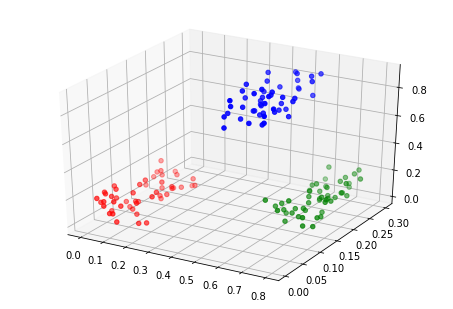

In [2]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50,3)/5

data = np.float32(np.concatenate((c1, c2, c3)))
colors = ['red']*50
colors.extend(['green']*50)
colors.extend(['blue']*50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [3]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 6.37 s, sys: 12 ms, total: 6.38 s
Wall time: 5.16 s


## Planar maps

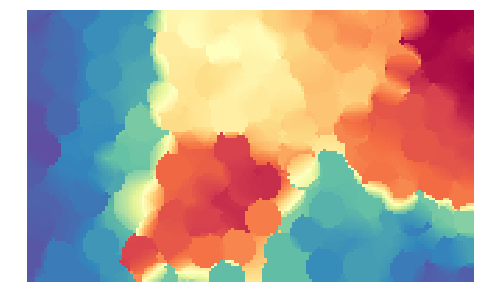

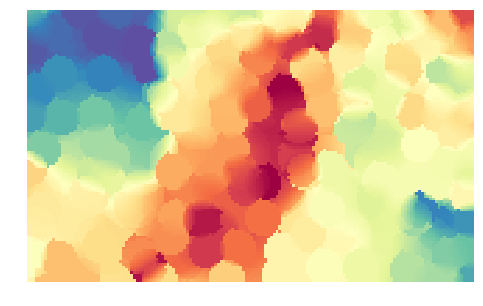

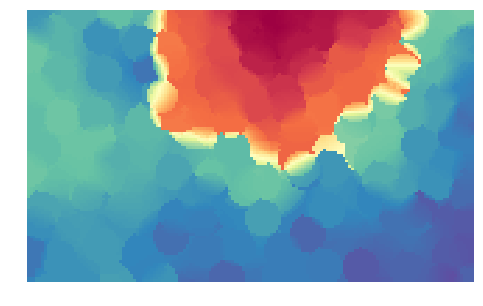

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [4]:
som.view_component_planes()

In [5]:
data[0]

array([ 0.00044047,  0.07308087,  0.18191735], dtype=float32)

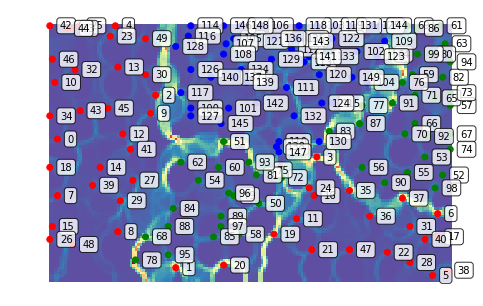

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [6]:
# point color corresponding to classes and label to indexes
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

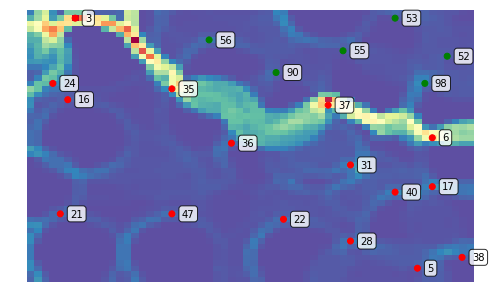

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [7]:
# Zoom
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels,
                zoom=((50, n_rows), (100, n_columns)))

## Toroid topology, hexagonal grid

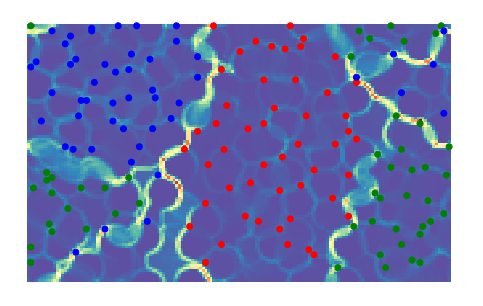

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [8]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype='toroid')
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

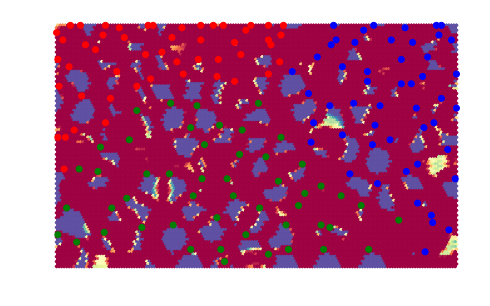

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [9]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, gridtype="hexagonal")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

### Initialization with principal component analysis and clustering the results

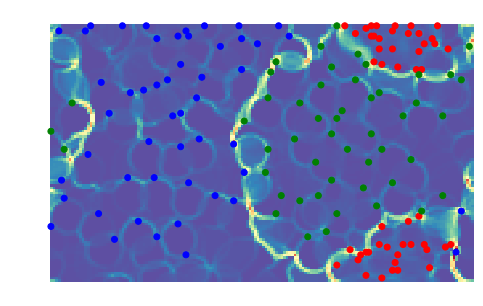

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [10]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

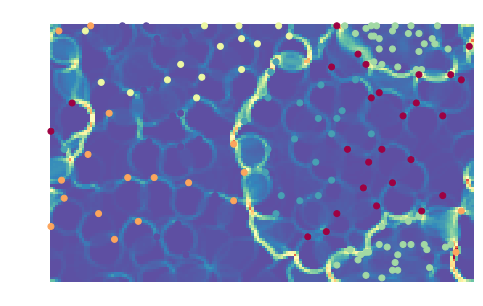

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [11]:
som.cluster()
som.view_umatrix(bestmatches=True)

## Evolving maps

In [12]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid")
som.train()

We will move the green points

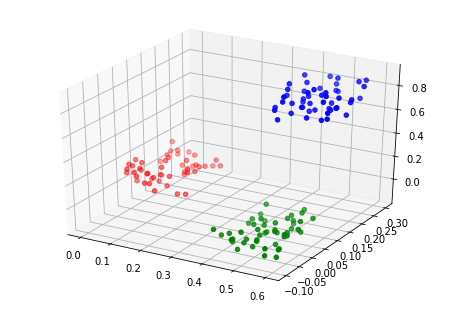

In [13]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

Update the SOM matrix

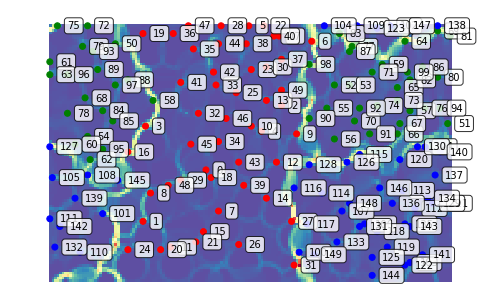

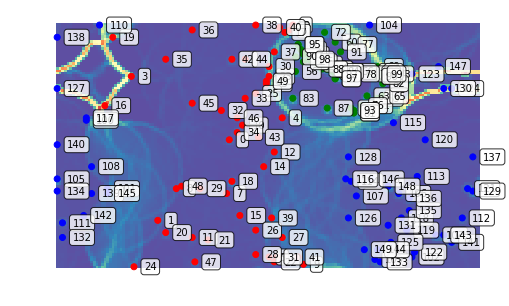

<module 'matplotlib.pyplot' from '/home/anaelle/anaconda/envs/bunnies/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [14]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

The relationship of the red and green clusters has been redefined as their coordinates inched closer in the original space